## Convolutional Neural Networks - introduction

# CNN with Tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


#### Load and inspect CIFAR-10 dataset
The CIFAR-10 dataset consists of, in total, 60000 color images, each with one of 10 labels: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. For an introduction and a download, see [this link](https://www.cs.toronto.edu/~kriz/cifar.html).

In [2]:
# Import the CIFAR-10 dataset and rescale the pixel values

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

In [3]:
X_train.shape

(50000, 32, 32, 3)

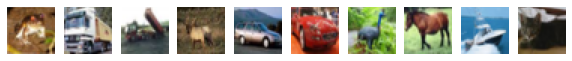

In [4]:
# Plot the first 10 CIFAR-10 images

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train[0].shape

(32, 32, 3)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPooling2D

In [7]:
def get_model(input_shape):
    model = Sequential([InputLayer(input_shape=input_shape),
                        Conv2D(filters=32,  kernel_size=(3, 3), activation='relu', name='conv_1'),
                        MaxPooling2D(pool_size=(2, 2), name='pool_1'),
                        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='conv_2'),
                        MaxPooling2D(pool_size=(2, 2), name='pool_2'),
                        Flatten(name='flatten'),
                        Dense(units=64, activation='relu', name='dense_1'),
                        Dense(units=10, activation='softmax', name='dense_2')])
    
    return model

In [8]:
def compile_model(model):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Introduce function to test model accuracy

def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

In [10]:
# Create an instance of the model and show model summary
model=get_model(X_train[0].shape)
compile_model(model)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 15, 15, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 13, 13, 64)        18496     
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                6

In [12]:
get_test_accuracy(model,X_test,y_test)

accuracy: 0.094


In [13]:
# Fit model, with simple checkpoint which saves (and overwrites) model weights every epoch
epochs=10
history=model.fit(X_train,y_train,epochs=epochs,validation_split=0.1,verbose=1)

Epoch 1/10
1407/1407 [==============================] - 40s 28ms/step - loss: 1.5011 - accuracy: 0.4604 - val_loss: 1.2761 - val_accuracy: 0.5476
Epoch 2/10
1407/1407 [==============================] - 32s 23ms/step - loss: 1.1535 - accuracy: 0.5962 - val_loss: 1.0840 - val_accuracy: 0.6208
Epoch 3/10
1407/1407 [==============================] - 32s 23ms/step - loss: 1.0233 - accuracy: 0.6432 - val_loss: 1.0865 - val_accuracy: 0.6320
Epoch 4/10
1407/1407 [==============================] - 35s 25ms/step - loss: 0.9384 - accuracy: 0.6731 - val_loss: 0.9414 - val_accuracy: 0.6754
Epoch 5/10
1407/1407 [==============================] - 33s 23ms/step - loss: 0.8700 - accuracy: 0.6939 - val_loss: 0.9095 - val_accuracy: 0.6856
Epoch 6/10
1407/1407 [==============================] - 49s 35ms/step - loss: 0.8149 - accuracy: 0.7169 - val_loss: 0.9220 - val_accuracy: 0.6920
Epoch 7/10
1407/1407 [==============================] - 32s 22ms/step - loss: 0.7572 - accuracy: 0.7369 - val_loss: 0.9534 -

In [14]:
get_test_accuracy(model,X_test,y_test)

accuracy: 0.695


In [7]:
import matplotlib.pyplot as plt
xvals=range(epochs)
fig,ax=plt.subplots(1,1)
ax.plot(xvals, history.history['val_accuracy'],label='validation set accuracy')
ax.plot(xvals, history.history['accuracy'],label='train set accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()

NameError: name 'epochs' is not defined

# Dataset augmentaton using TensorFlow data generator: 
(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

Overfitting occurs when you have too few records relative to other parameters (e.g., predictors or features). I'm not familiar with your data, but it sounds like the subsetting is creating additional records. 

Data augmentation artificially increases the size of the training set by generating many realistic variants of each training instance. Data augmentation is a technique used for introducing variety in training data thereby helping to mitigate overfitting.

Data augmentation makes a sample data look slightly different every time it is processed by the model. The process makes each data set appear unique to the model and prevents the model from learning the characteristics of the data sets.

***So... data augmentation is particularly important for small datasets***


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2,
    zoom_range=0.5,
    fill_mode='nearest')
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)

In [8]:
datagen.fit(X_train)

In [9]:
train_aug=datagen.flow(X_train, y_train, batch_size=32,
         subset='training',shuffle=True)

valid_aug=datagen.flow(X_train, y_train, batch_size=32,
         subset='training',shuffle=True)

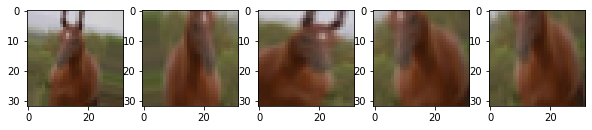

In [10]:
def plot_images(rows,cols,sample_img_array):
    fig,axes=plt.subplots(rows,
                          cols,
                          figsize=(10,10))
    for img,ax in zip(sample_img_array,axes):
        ax.imshow(img)
    plt.show()

augmented_images = [train_aug[0][0][3] for i in range(5)]
plot_images(1,5,augmented_images)

#### `train_aug` is a package of X_train and y_train

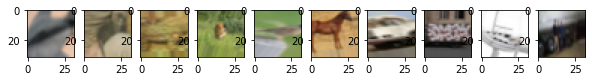

In [23]:
x_gen,y_gen = train_aug.next()

fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].imshow(x_gen[i])

or...

32


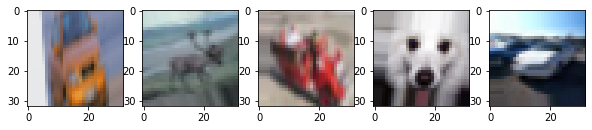

In [12]:
sample_img_array,_ = train_aug.next()
print(len(sample_img_array))
plot_images(1,5,sample_img_array[0:5])

In [24]:
model=get_model(X_train[0].shape)
compile_model(model)

In [25]:
get_test_accuracy(model,X_test,y_test)

accuracy: 0.096


In [26]:
epochs=10
history=model.fit(train_aug,validation_data=valid_aug,epochs=epochs)

Epoch 1/10
1250/1250 [==============================] - 46s 36ms/step - loss: 1.7901 - accuracy: 0.3513 - val_loss: 1.6703 - val_accuracy: 0.3983
Epoch 2/10
1250/1250 [==============================] - 47s 38ms/step - loss: 1.5633 - accuracy: 0.4376 - val_loss: 1.5020 - val_accuracy: 0.4531
Epoch 3/10
1250/1250 [==============================] - 49s 39ms/step - loss: 1.4639 - accuracy: 0.4817 - val_loss: 1.4006 - val_accuracy: 0.5033
Epoch 4/10
1250/1250 [==============================] - 46s 37ms/step - loss: 1.3884 - accuracy: 0.5088 - val_loss: 1.3346 - val_accuracy: 0.5178
Epoch 5/10
1250/1250 [==============================] - 45s 36ms/step - loss: 1.3529 - accuracy: 0.5202 - val_loss: 1.3442 - val_accuracy: 0.5280
Epoch 6/10
1250/1250 [==============================] - 42s 34ms/step - loss: 1.3195 - accuracy: 0.5357 - val_loss: 1.3403 - val_accuracy: 0.5307
Epoch 7/10
1250/1250 [==============================] - 45s 36ms/step - loss: 1.2923 - accuracy: 0.5430 - val_loss: 1.2924 -

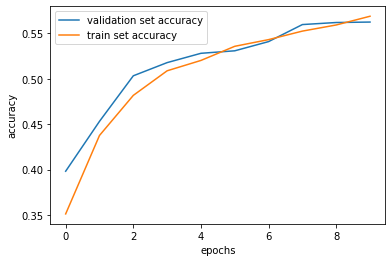

In [27]:
import matplotlib.pyplot as plt
xvals=range(epochs)
fig,ax=plt.subplots(1,1)
ax.plot(xvals, history.history['val_accuracy'],label='validation set accuracy')
ax.plot(xvals, history.history['accuracy'],label='train set accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()

In [28]:
get_test_accuracy(model,X_test,y_test)

accuracy: 0.638


Here we may not see a great improvement with the data augmentation because the original set has 60k images. This is a still large dataset